In [74]:

'''

Add bets places on top 2 metric 
    - Placed is doing better so maybe this will also
    
Add bets placed on the second favourite model
    - ??

'''

'\n\nAdd bets places on top 2 metric \n    - Placed is doing better so maybe this will also\n    \nAdd bets placed on the second favourite model\n    - ??\n\n'


# Classification Evaluation Metrics


In [75]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [76]:

class Data(object):
    pass

df = Data
summ = Data


In [77]:
import helpdesk as hd

In [78]:
# Import writer class from csv module
from csv import writer

import pandas as pd, numpy as np
from datetime import datetime

import random, time


In [79]:

DEBUG = True
seed = 1919


In [80]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [81]:
#%run "C040_MDL_NN w TensorFlow.ipynb"

In [82]:

#mid = 27823768
#mid = 27825824
#mid = 27826822

#mid = 27826849
#mid = 27826854

#mid = 27828481
#mid = 27828521

#mid = 27835204
#mid = 27835263

#mid = 27835398
#mid = 27835456
#mid = 27847095

#mid = 27862559

#mid = 27952906

mid = 27953083


In [83]:

#preds_dataset_name = 'predictions_dataset_2022-10-18.csv'
#preds_dataset_name = 'predictions_dataset_2022-10-27.csv'

preds_dataset_name = f'predictions_dataset_{mid}_2023-02-23.csv'

df_preds = pd.read_csv(f'{fileloc}/{preds_dataset_name}')

print(df_preds.shape)
print()
print(df_preds.columns.values.tolist())


(158957, 10)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid']


In [84]:

dataset_base = f'dataset_base_2023-02-09.csv'

df_base = pd.read_csv(f'{fileloc}/{dataset_base}')

print(df_base.shape)
print()
print(df_base.columns.values.tolist())


(641710, 45)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [85]:

print(df_preds.shape)
print(df_base.shape)

df_eval_raw = pd.merge(df_preds, df_base, on = ['@id_DOG','@id_RACE'], how = 'inner')

print(df_eval_raw.shape)
print(df_eval_raw.columns.values.tolist())



(158957, 10)
(641710, 45)
(158957, 53)
['@id_DOG', 'DogName_x', 'y_runtime_x', 'RaceId_x', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid', 'DogName_y', 'y_runtime_y', 'RaceId_y', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [86]:
# Plotting the RaceGrade

In [87]:

print(pd.DataFrame(df_eval_raw.isna().sum()).transpose())


   @id_DOG  DogName_x  y_runtime_x  RaceId_x  @id_RACE  yearqtr  yearmon  ttflag  preds  mid  DogName_y  y_runtime_y  RaceId_y  Distance  RaceGrade  Track  Event_Dt  Prizemoney  TrainerId  \
0        0          0            0         0         0        0        0       0      0    0          0            0         0         0          0      0         0       49663          0   

   TrainerName  ft_sp  x_num_dogs  position  y_margin  y_pos  ...  rand_uniform  position_random  Winner_random  Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  rand_1  h_rand_1  \
0            0      0           0         0         0      0  ...             0                0              0            0                   0                0              0       0         0   

   p_rand_1  rand_all_plc  h_rand_all_plc  p_rand_all_plc  rand_lay_last  h_rand_lay_last  p_rand_lay_last  ft_1  h_ft_1  p_ft_1  ft_all_plc  h_ft_all_plc  p_ft_all_plc  ft_lay_last  h_ft_lay_last  \
0         0         

In [88]:

df_eval_raw.describe()


,@id_DOG,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,preds,mid,y_runtime_y,RaceId_y,Prizemoney,TrainerId,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
count,1.589570e+05,158957.000000,1.589570e+05,1.589570e+05,158957.000000,158957.000000,158957.000000,158957.0,158957.000000,1.589570e+05,109294.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.0,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000
mean,5.583402e+08,24.263861,8.384621e+08,8.384621e+08,202219.048831,202224.426876,2.857857,27953083.0,24.263861,8.384621e+08,455.786759,116357.190611,17.367823,7.378102,4.187107,6.413131,4.187107,0.138050,0.413753,0.5,0.495923,4.189051,0.137811,0.413433,4.049026,0.141648,0.431148,0.137811,0.019307,-0.036311,0.350636,0.048252,-0.089701,0.137811,0.118957,-0.373615,0.141648,0.057789,-0.018699,0.365136,0.099813,-0.062147,0.102562,0.100763,-0.174047
std,9.314756e+07,4.933295,1.681482e+07,1.681482e+07,35.589144,33.276325,1.448929,0.0,4.933295,1.681482e+07,3348.621245,83609.825656,21.730137,0.871674,2.169483,4.825999,2.169483,0.344953,0.492507,0.0,0.999438,2.169408,0.344702,0.492451,2.092162,0.348690,0.495238,0.344702,0.137603,1.138373,0.477171,0.214299,1.838062,0.344702,0.323739,5.608354,0.348690,0.233345,0.425230,0.481470,0.299752,0.956705,0.303387,0.301016,7.747554
min,1.351337e+08,15.330000,8.076312e+08,8.076312e+08,202203.000000,202208.000000,1.122183,27953083.0,15.330000,8.076312e+08,0.000000,6418.000000,1.000000,5.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.5,-3.800535,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000
25%,4.987465e+08,20.430000,8.248449e+08,8.248449e+08,202203.000000,202209.000000,1.750585,27953083.0,20.430000,8.248449e+08,0.000000,66071.000000,4.200000,7.000000,2.000000,2.560000,2.000000,0.000000,0.000000,0.5,-0.179736,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,5.663479e+08,23.400000,8.379312e+08,8.379312e+08,202204.000000,202210.000000,2.386165,27953083.0,23.400000,8.379312e+08,100.000000,100170.000000,8.700000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.498164,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.367199e+08,26.710000,8.540256e+08,8.540256e+08,202204.000000,202212.000000,3.531586,27953083.0,26.710000,8.540256e+08,460.000000,127311.000000,21.000000,8.000000,6.000000,9.200000,6.000000,0.000000,1.000000,0.5,1.171044,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.071650e+09,53.290000,8.686263e+08,8.686263e+08,202301.000000,202301.000000,12.081210,27953083.0,53.290000,8.686263e+08,1000000.000000,335886.000000,410.000000,8.000000,8.000000,27.000000,8.000000,1.000000,1.000000,0.5,4.928041,8

In [89]:

df_eval_raw.head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
0,135133731,SOUTHWOOD MIA,20.41,811481246,811481246,202203,202208,Train,7.025764,27953083,SOUTHWOOD MIA,20.41,811481246,340m,Grade 5,Gunnedah,2022-08-04,0.0,62451,S Howarth,101.0,8,8,12.25,8,...,2.312394,1.0,1,1,7.0,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1,140577118,PHANTOM OWL,18.26,820706339,820706339,202203,202209,Train,1.800420,27953083,PHANTOM OWL,18.26,820706339,324m,Masters Grade 3,Richmond,2022-09-03,350.0,99649,C Pollard,18.0,8,3,4.50,3,...,0.879634,3.0,0,1,6.0,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
2,148673258,SPEEDY MARINA,18.51,807631353,807631353,202203,202208,Train,8.084717,27953083,SPEEDY MARINA,18.51,807631353,307m,Grade 5,Bathurst,2022-08-01,0.0,65928,D Lee,101.0,8,7,8.25,7,...,-1.807561,8.0,0,0,7.0,0,0,0,0,0.0,0,0,0.0,1,1,1.0,0,0,0.0,0,0,0.0,0,0,0.0
3,148673258,SPEEDY MARINA,19.22,820735785,820735785,202203,202209,Train,9.047941,27953083,SPEEDY MARINA,19.22,820735785,318m,Grade 5,Dubbo,2022-09-03,0.0,65928,D Lee,101.0,8,7,12.25,7,...,0.918399,2.0,0,1,8.0,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,1,1,1.0
4,148673258,SPEEDY MARINA,17.88,824820637,824820637,202203,202209,Train,5.538195,27953083,SPEEDY MARINA,17.88,824820637,287m,Grade 5,Lithgow,2022-09-17,0.0,65928,D Lee,11.0,7,4,9.00,4,...,2.183121,1.0,1,1,5.0,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0


In [90]:

df_evaluation = df_eval_raw.copy()


In [91]:

# groupings
groupings = ['@id_RACE']

## Rank for Place Preds
#df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=False)
df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=True)

# Winner / Place Preds Columns
df_evaluation['Winner_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 1 else 0, axis = 1)
df_evaluation['Top3_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)

print(datetime.now())


2023-02-23 20:45:33.254026


In [92]:

df_poscount = df_evaluation.groupby(groupings).agg({'position_preds':'nunique'}).reset_index().rename(columns= {'position_preds':'poscount'})


In [93]:

df_eval_v2 = df_evaluation.merge(df_poscount, on = groupings, how = 'left')

df_eval_v2['preds_tie'] = df_eval_v2.apply(lambda x : 0 if x.x_num_dogs == x.poscount \
                                           else 1 if x.x_num_dogs == x.poscount + 1 \
                                           else 2 if x.x_num_dogs == x.poscount + 2 \
                                           else 3 if x.x_num_dogs == x.poscount + 3 \
                                           else 4 if x.x_num_dogs == x.poscount + 4 \
                                           else 5 if x.x_num_dogs == x.poscount + 5 \
                                           else 6 if x.x_num_dogs == x.poscount + 6 \
                                           else 7 if x.x_num_dogs == x.poscount + 7 \
                                           else 8 if x.x_num_dogs == x.poscount + 8 else 99, axis = 1)

print()

print(df_eval_v2.shape)
print(df_eval_v2.columns.values.tolist())



(158957, 58)
['@id_DOG', 'DogName_x', 'y_runtime_x', 'RaceId_x', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid', 'DogName_y', 'y_runtime_y', 'RaceId_y', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'position_preds', 'Winner_preds', 'Top3_preds', 'poscount', 'preds_tie']


In [94]:

print()
print(df_eval_v2.groupby(['preds_tie']).agg({'@id_RACE':'nunique'}).reset_index())



   preds_tie  @id_RACE
0          0     21702
1          1       172
2          2        24
3          3         6
4          4         1
5          5         1


In [95]:

#df_evaluation[df_evaluation['@id_RACE'].isin([626271182])].head()
df_eval_v2[df_eval_v2['ttflag'].isin(['Test'])].head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
133739,161977365,FILTHY PHANTOM,23.38,860994561,860994561,202301,202301,Test,4.318971,27953083,FILTHY PHANTOM,23.38,860994561,400m,Masters,Gawler,2023-01-04,0.0,110385,T Hinrichsen,21.0,7,6,5.25,6,...,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,6.0,0,0,7,0
133740,161977365,FILTHY PHANTOM,19.91,860994737,860994737,202301,202301,Test,3.556053,27953083,FILTHY PHANTOM,19.91,860994737,342m,Masters,Angle Park,2023-01-09,1070.0,110385,T Hinrichsen,12.0,8,1,1.75,1,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,7.0,0,0,8,0
133741,161977365,FILTHY PHANTOM,23.45,860994815,860994815,202301,202301,Test,2.566929,27953083,FILTHY PHANTOM,23.45,860994815,400m,Restricted Win,Mount Gambier,2023-01-12,190.0,110385,T Hinrichsen,4.4,8,2,3.50,2,...,0,1,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,1,0,-1.0,0,0,0.0,5.0,0,0,8,0
133742,161977365,FILTHY PHANTOM,20.24,863837831,863837831,202301,202301,Test,1.807495,27953083,FILTHY PHANTOM,20.24,863837831,342m,Masters,Angle Park,2023-01-16,0.0,110385,T Hinrichsen,5.5,6,5,3.25,5,...,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,2.0,0,1,6,0
133743,161977365,FILTHY PHANTOM,23.43,860995032,860995032,202301,202301,Test,2.820433,27953083,FILTHY PHANTOM,23.43,860995032,400m,Restricted Win,Mount Gambier,2023-01-19,190.0,110385,T Hinrichsen,11.0,8,2,4.25,2,...,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,6.0,0,0,8,0


In [96]:

df_eval_v2.describe()


,@id_DOG,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,preds,mid,y_runtime_y,RaceId_y,Prizemoney,TrainerId,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
count,1.589570e+05,158957.000000,1.589570e+05,1.589570e+05,158957.000000,158957.000000,158957.000000,158957.0,158957.000000,1.589570e+05,109294.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.0,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000
mean,5.583402e+08,24.263861,8.384621e+08,8.384621e+08,202219.048831,202224.426876,2.857857,27953083.0,24.263861,8.384621e+08,455.786759,116357.190611,17.367823,7.378102,4.187107,6.413131,4.187107,0.138050,0.413753,0.5,0.495923,4.189051,0.137811,0.413433,4.049026,0.141648,0.431148,0.137811,0.019307,-0.036311,0.350636,0.048252,-0.089701,0.137811,0.118957,-0.373615,0.141648,0.057789,-0.018699,0.365136,0.099813,-0.062147,0.102562,0.100763,-0.174047,4.184144,0.137861,0.414106,7.366898,0.011204
std,9.314756e+07,4.933295,1.681482e+07,1.681482e+07,35.589144,33.276325,1.448929,0.0,4.933295,1.681482e+07,3348.621245,83609.825656,21.730137,0.871674,2.169483,4.825999,2.169483,0.344953,0.492507,0.0,0.999438,2.169408,0.344702,0.492451,2.092162,0.348690,0.495238,0.344702,0.137603,1.138373,0.477171,0.214299,1.838062,0.344702,0.323739,5.608354,0.348690,0.233345,0.425230,0.481470,0.299752,0.956705,0.303387,0.301016,7.747554,2.166955,0.344755,0.492568,0.881656,0.128459
min,1.351337e+08,15.330000,8.076312e+08,8.076312e+08,202203.000000,202208.000000,1.122183,27953083.0,15.330000,8.076312e+08,0.000000,6418.000000,1.000000,5.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.5,-3.800535,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000,1.000000,0.000000,0.000000,3.000000,0.000000
25%,4.987465e+08,20.430000,8.248449e+08,8.248449e+08,202203.000000,202209.000000,1.750585,27953083.0,20.430000,8.248449e+08,0.000000,66071.000000,4.200000,7.000000,2.000000,2.560000,2.000000,0.000000,0.000000,0.5,-0.179736,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,7.000000,0.000000
50%,5.663479e+08,23.400000,8.379312e+08,8.379312e+08,202204.000000,202210.000000,2.386165,27953083.0,23.400000,8.379312e+08,100.000000,100170.000000,8.700000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.498164,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,8.000000,0.000000
75%,6.367199e+08,26.710000,8.540256e+08,8.540256e+08,202204.000000,202212.000000,3.531586,27953083.0,26.710000,8.540256e+08,460.000000,127311.000000,21.000000,8.000000,6.000000,9.200000,6.000000,0.000000,1.000000,0.5,1.171044,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000

In [97]:

df_eval_v2.sort_values(by = ['@id_RACE','position']).head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
34858,498666857,HES UNDER WRAPS,30.48,807631247,807631247,202203,202208,Train,1.538607,27953083,HES UNDER WRAPS,30.48,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,2145.0,317939,D Howlin,11.0,8,1,0.75,1,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,1,1,8,0
118389,656363743,MISS WILDER,30.53,807631247,807631247,202203,202208,Train,1.801358,27953083,MISS WILDER,30.53,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,620.0,93556,P Ryan,5.0,8,2,0.75,2,...,0,1,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,1,0,-1.0,0,0,0.0,3.0,0,1,8,0
127775,677865077,CRIKEY DANGER,30.64,807631247,807631247,202203,202208,Train,1.753813,27953083,CRIKEY DANGER,30.64,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,300.0,92095,A Clark,1.5,8,3,2.25,3,...,1,1,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0,2.0,0,1,8,0
116920,654230927,POSH DANGER,30.75,807631247,807631247,202203,202208,Train,3.070850,27953083,POSH DANGER,30.75,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,100.0,92095,A Clark,16.0,8,4,3.75,4,...,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,6.0,0,0,8,0
20304,449530772,RIP ON BYE,30.92,807631247,807631247,202203,202208,Train,2.014196,27953083,RIP ON BYE,30.92,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,0.0,27643,R Work,10.0,8,5,6.25,5,...,0,1,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,0,0,0.0,4.0,0,0,8,0


In [98]:

df_eval_test = df_eval_v2[df_eval_v2.ttflag.isin(['Test'])]


In [99]:

pd.crosstab(df_eval_test.position, df_eval_test.position_preds)


position_preds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
position,,,,,,,,
1,952,787,632,463,301,203,118,45
2,735,662,603,510,412,308,175,88
3,565,590,565,544,465,364,269,136
4,418,493,499,578,552,475,305,178
5,338,370,444,559,626,553,370,227
6,238,304,364,407,540,649,465,300
7,147,187,264,276,397,462,572,343
8,103,105,129,165,201,253,369,501


In [100]:

df_eval_test.groupby( [ 'ttflag', 'Top3_actual', 'Top3_preds']).agg({'@id_DOG':'count'}).reset_index()


,ttflag,Top3_actual,Top3_preds,@id_DOG
0,Test,0,0,10323
1,Test,0,1,4403
2,Test,1,0,4401
3,Test,1,1,6091


In [101]:

pd.crosstab(df_eval_v2.Top3_actual, df_eval_v2.Top3_preds, normalize='all')


Top3_preds,0,1
Top3_actual,,
0,0.410526,0.175720
1,0.175368,0.238385


In [102]:

pd.crosstab(df_eval_test.Top3_actual, df_eval_test.Top3_preds, normalize='all')


Top3_preds,0,1
Top3_actual,,
0,0.409350,0.174598
1,0.174518,0.241534


In [103]:

pd.crosstab(df_eval_test.Winner_actual, df_eval_test.Winner_preds, normalize='all')


Winner_preds,0,1
Winner_actual,,
0,0.760290,0.100880
1,0.101079,0.037751


In [104]:

df_eval_test.tail(3)


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
158954,838072304,SMIRCH BIRCH,16.42,865597839,865597839,202301,202301,Test,1.911044,27953083,SMIRCH BIRCH,16.42,865597839,275m,Novice Grade 5,Cannington,2023-01-23,190.0,105162,A Scott,5.40,8,3,1.00,3,...,0,1,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,1,0,-1.0,0,0,0.0,2.0,0,1,8,0
158955,838072304,SMIRCH BIRCH,22.26,865622633,865622633,202301,202301,Test,2.086583,27953083,SMIRCH BIRCH,22.26,865622633,380m,Novice Grade 5,Cannington,2023-01-30,820.0,105162,A Scott,7.40,8,2,9.50,2,...,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,3.0,0,1,8,0
158956,850816754,WADE KEEPING,23.34,865598020,865598020,202301,202301,Test,2.639591,27953083,WADE KEEPING,23.34,865598020,400m,Maiden,Dubbo,2023-01-28,340.0,53037,F Cole,1.65,7,2,3.75,2,...,1,1,1,0,-1.0,1,0,-1.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0,3.0,0,1,6,1


In [105]:

print(datetime.now())


2023-02-23 20:45:36.813864


In [106]:

# vs Predictions Strategies 


In [107]:

# Bet on all Preds = s1
df_eval_v2['s_1'] = df_eval_v2.apply( lambda x : 1 if x.position_preds == 1 else 0, axis = 1 )
df_eval_v2['h_s_1'] = df_eval_v2.apply( lambda x : 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_eval_v2['p_s_1'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )


print()
print(datetime.now())

# Bet on all Place = s2
#df_eval_v2['fs_2'] = df_eval_v2.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
df_eval_v2["s_all_plc"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_preds) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_preds <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_preds <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)

df_eval_v2['h_s_all_plc'] = df_eval_v2.apply( lambda x : 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_all_plc'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())

# Laying Last 
df_eval_v2["s_lay_last"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs == x.position_fasttrack) \
                                                                   else 0, axis = 1)

df_eval_v2['h_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.s_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())
#3min runtime



2023-02-23 20:45:46.813150

2023-02-23 20:46:00.635398

2023-02-23 20:46:10.477771


In [108]:

df_eval_v2.head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie,s_1,h_s_1,p_s_1,s_all_plc,h_s_all_plc,p_s_all_plc,s_lay_last,h_s_lay_last,p_s_lay_last
0,135133731,SOUTHWOOD MIA,20.41,811481246,811481246,202203,202208,Train,7.025764,27953083,SOUTHWOOD MIA,20.41,811481246,340m,Grade 5,Gunnedah,2022-08-04,0.0,62451,S Howarth,101.0,8,8,12.25,8,...,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,8.0,0,0,8,0,0,0,0.0,0,0,0.0,0,0,0.0
1,140577118,PHANTOM OWL,18.26,820706339,820706339,202203,202209,Train,1.800420,27953083,PHANTOM OWL,18.26,820706339,324m,Masters Grade 3,Richmond,2022-09-03,350.0,99649,C Pollard,18.0,8,3,4.50,3,...,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,2.0,0,1,8,0,0,0,0.0,1,0,-1.0,0,0,0.0
2,148673258,SPEEDY MARINA,18.51,807631353,807631353,202203,202208,Train,8.084717,27953083,SPEEDY MARINA,18.51,807631353,307m,Grade 5,Bathurst,2022-08-01,0.0,65928,D Lee,101.0,8,7,8.25,7,...,1,1.0,0,0,0.0,0,0,0.0,0,0,0.0,8.0,0,0,8,0,0,0,0.0,0,0,0.0,0,0,0.0
3,148673258,SPEEDY MARINA,19.22,820735785,820735785,202203,202209,Train,9.047941,27953083,SPEEDY MARINA,19.22,820735785,318m,Grade 5,Dubbo,2022-09-03,0.0,65928,D Lee,101.0,8,7,12.25,7,...,0,0.0,0,0,0.0,0,0,0.0,1,1,1.0,8.0,0,0,8,0,0,0,0.0,0,0,0.0,1,1,1.0
4,148673258,SPEEDY MARINA,17.88,824820637,824820637,202203,202209,Train,5.538195,27953083,SPEEDY MARINA,17.88,824820637,287m,Grade 5,Lithgow,2022-09-17,0.0,65928,D Lee,11.0,7,4,9.00,4,...,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,7.0,0,0,7,0,0,0,0.0,0,0,0.0,0,0,0.0


In [109]:

pd.set_option('display.max_rows', 50)


In [110]:

df_eval_v2.ttflag.value_counts()


Train    133739
Test      25218
Name: ttflag, dtype: int64


#### Correlations (A Good & Quick way to understand progress)


In [111]:

#df_eval_test = df_eval_v2[df_eval_v2.ttflag.isin(['Test'])]

print('Random vs Actuals')
RvA = df_eval_test['position_random'].corr( df_eval_test['position'])
print(RvA)
print()

print('FastTrack vs Actuals')
FTvA = df_eval_test['position_fasttrack'].corr(df_eval_test['position'])
print(FTvA)
print()

print('Predicted vs Actuals')
PvA = df_eval_test['position_preds'].corr( df_eval_test['position'])
print(PvA)

print()
print('Preds vs Fasttrack')
PvFT = df_eval_test['position_preds'].corr(df_eval_test['position_fasttrack'])
print(PvFT)


Random vs Actuals
0.04101828721694104

FastTrack vs Actuals
0.4826768673647951

Predicted vs Actuals
0.3889743407428268

Preds vs Fasttrack
0.6596891949904115


In [112]:

print('Top 3 Preds vs Actuals')
T3PvA = df_eval_test['Top3_preds'].corr(df_eval_test['Top3_actual'])
print(T3PvA)


Top 3 Preds vs Actuals
0.2815348662248397


In [113]:

print('Winner Preds vs Actuals')
T1PvA = df_eval_test['Winner_preds'].corr(df_eval_test['Winner_actual'])
print(T1PvA)


Winner Preds vs Actuals
0.1548718721099649


In [114]:

correls = pd.DataFrame(columns = ['Mid','RvA','FTvA','PvA','PvFT','T3PvA','T1PvA'])
correls.loc[len(correls)] = [int(mid), RvA, FTvA, PvA, PvFT, T3PvA, T1PvA]
                       

In [115]:

correls.head()


,Mid,RvA,FTvA,PvA,PvFT,T3PvA,T1PvA
0,27953083.0,0.041018,0.482677,0.388974,0.659689,0.281535,0.154872


In [116]:

# Run this if new variable has been added
#correls.to_csv(f'{fileloc}/correls.csv', index = False)


In [117]:

# List that we want to add as a new row
#List = [6, 'William', 5532, 1, 'UAE']
row_to_append = [mid, RvA, FTvA, PvA, PvFT, T3PvA, T1PvA]

# Open our existing CSV file in append mode
# Create a file object for this file
with open(f"{fileloc}/correls.csv", 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(row_to_append)
 
    # Close the file object
    f_object.close()


#### Check for consistency over the days, weeks and quarters

In [118]:

df_eval_v2['Event_qtr'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').quarter)


In [119]:

print(df_eval_v2['Event_qtr'].value_counts())


4    79710
3    54029
1    25218
Name: Event_qtr, dtype: int64


In [120]:

df_eval_v2['Event_mth'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').month)


In [121]:

print(df_eval_v2['Event_mth'].value_counts())


8     27201
9     26828
10    26623
12    26558
11    26529
1     25218
Name: Event_mth, dtype: int64


In [122]:

#rupvar = ['Event_Dt']
rupvar = ['Event_mth']

df_plot = df_eval_v2[ df_eval_v2.ttflag == 'Test' ].groupby(rupvar).agg({'h_ft_1':'sum','p_ft_1':'sum','h_ft_all_plc':'sum','p_ft_all_plc':'sum'\
                                ,'h_s_1':'sum','p_s_1':'sum','h_s_all_plc':'sum','p_s_all_plc':'sum'\
                                ,'h_rand_1':'sum','p_rand_1':'sum','h_rand_all_plc':'sum','p_rand_all_plc':'sum'})\
                    .reset_index()

print(df_plot.shape)
print()

print(df_plot.columns.values.tolist())
print()

print(datetime.now())


(1, 13)

['Event_mth', 'h_ft_1', 'p_ft_1', 'h_ft_all_plc', 'p_ft_all_plc', 'h_s_1', 'p_s_1', 'h_s_all_plc', 'p_s_all_plc', 'h_rand_1', 'p_rand_1', 'h_rand_all_plc', 'p_rand_all_plc']

2023-02-23 20:46:36.010497


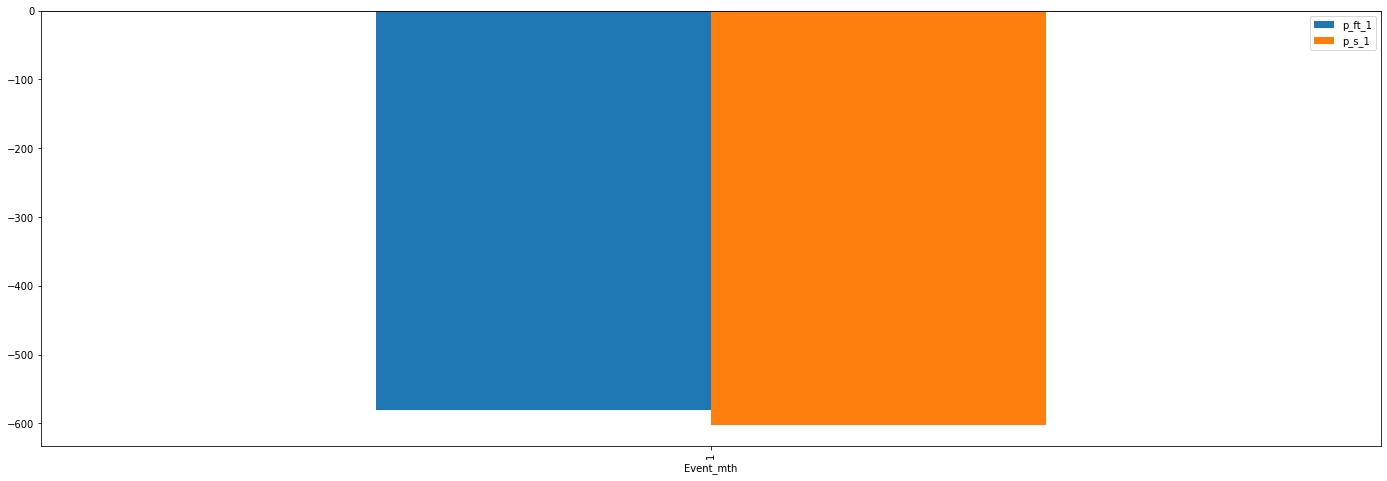

In [123]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_1','p_s_1'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


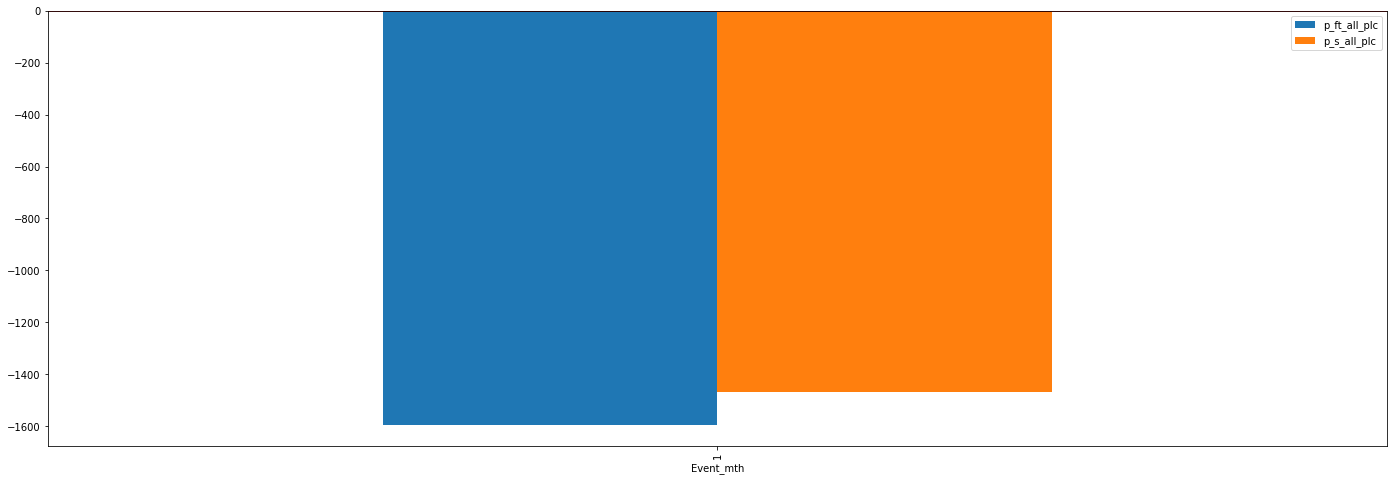

In [124]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_all_plc','p_s_all_plc'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


In [125]:

df_eval_v2['Event_wk'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').week)


In [126]:

print(df_eval_v2['Event_wk'].value_counts())


45    6362
37    6355
39    6310
33    6291
50    6289
35    6264
48    6249
34    6218
36    6212
47    6209
49    6206
46    6203
43    6132
2     6122
31    6048
41    6032
38    6001
32    5958
42    5953
52    5942
40    5930
44    5929
1     5928
4     5922
3     5807
51    5268
5      817
Name: Event_wk, dtype: int64


In [127]:

#rupvar = ['Event_Dt']
rupvar = ['Event_wk']

df_plot_wk = df_eval_v2[ df_eval_v2.ttflag == 'Test' ].groupby(rupvar).agg({'h_ft_1':'sum','p_ft_1':'sum','h_ft_all_plc':'sum','p_ft_all_plc':'sum'\
                                ,'h_s_1':'sum','p_s_1':'sum','h_s_all_plc':'sum','p_s_all_plc':'sum'\
                                ,'h_rand_1':'sum','p_rand_1':'sum','h_rand_all_plc':'sum','p_rand_all_plc':'sum'})\
                    .reset_index()

print(df_plot_wk.shape)
print()

print(df_plot_wk.columns.values.tolist())
print()

print(datetime.now())


(6, 13)

['Event_wk', 'h_ft_1', 'p_ft_1', 'h_ft_all_plc', 'p_ft_all_plc', 'h_s_1', 'p_s_1', 'h_s_all_plc', 'p_s_all_plc', 'h_rand_1', 'p_rand_1', 'h_rand_all_plc', 'p_rand_all_plc']

2023-02-23 20:46:48.206305


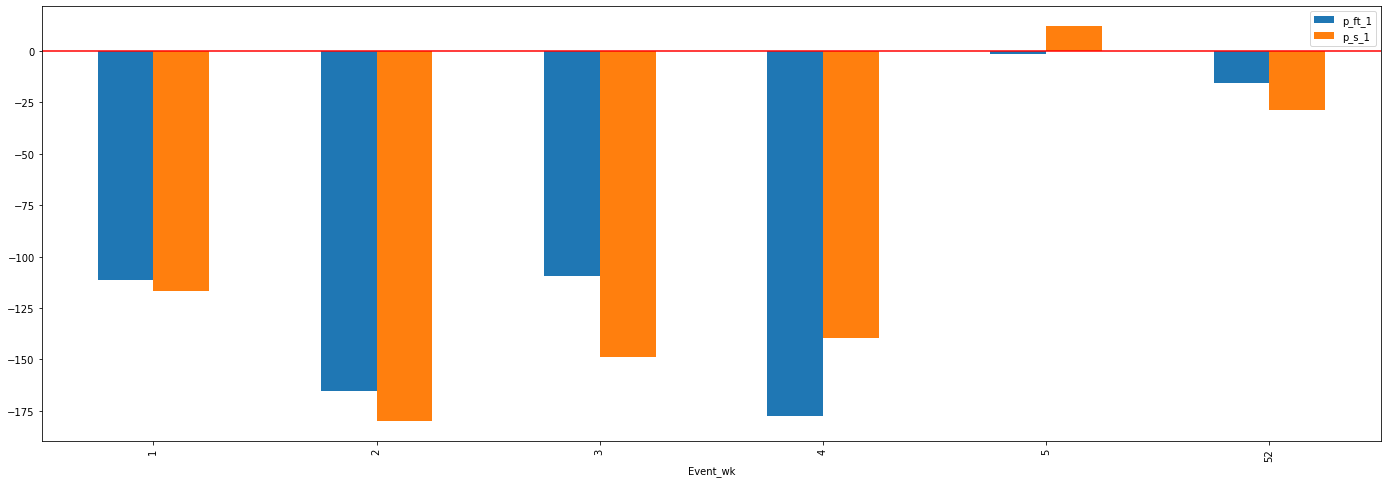

In [128]:

plt = df_plot_wk.plot(x= rupvar[0], y=['p_ft_1','p_s_1'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


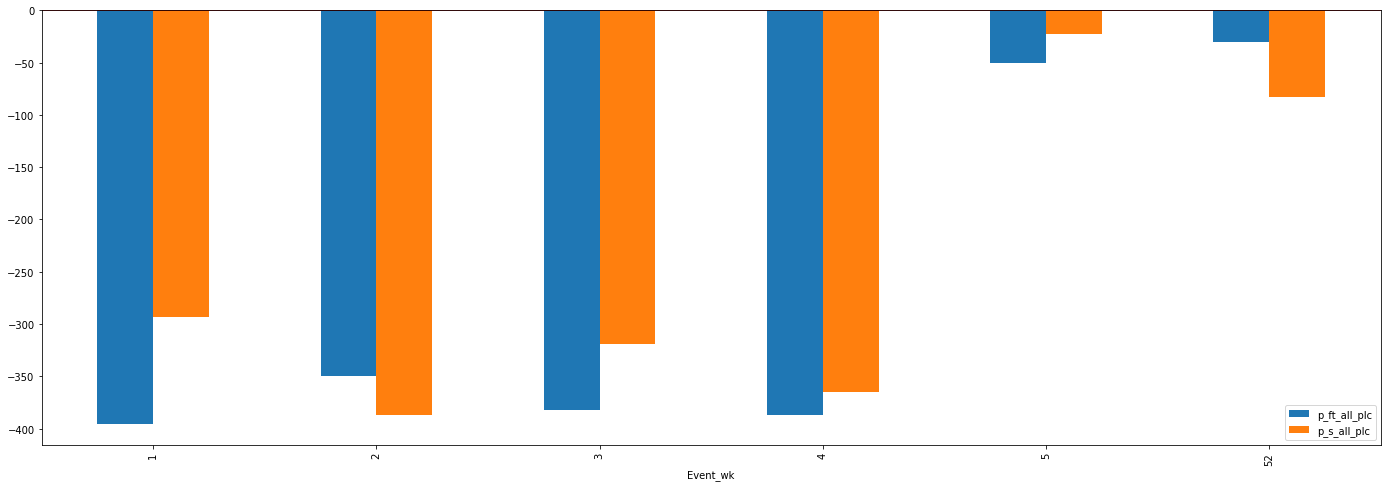

In [129]:

plt = df_plot_wk.plot(x= rupvar[0], y=['p_ft_all_plc','p_s_all_plc'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


### ft_sp groups profitability

In [ ]:

df_eval_v2['ft_sp_bins'] = pd.cut( df_eval_v2['ft_sp'], [-999,0,1,1.25,1.50,1.75,2.0,2.25,2.5,2.75,]


In [130]:

df_eval_v2['ft_sp_groups'] = df_eval_v2['ft_sp'].apply(lambda x : 'U001.5' if x <=1.5 \
                                                       else 'U002' if x<=2 \
                                                       else 'U003' if x<=3 \
                                                       else 'U004' if x<=4 \
                                                       else 'U005' if x<=5 \
                                                       else 'U007' if x<=7 \
                                                       else 'U010' if x<=10 \
                                                       else 'U015' if x<=15 \
                                                       else 'U025' if x<=25 \
                                                       else 'U040' if x<=40 \
                                                       else 'U060' if x<=60 \
                                                       else 'U100' if x<=100 else 'Other')

print(df_eval_v2['ft_sp_groups'].value_counts())
                                                       

U025      19768
U010      19359
U007      17668
U015      17584
U004      14902
U003      14450
U040      13851
U005      13558
U060       8463
U100       6985
U002       5950
Other      3678
U001.5     2741
Name: ft_sp_groups, dtype: int64


In [131]:

print(df_eval_v2.columns.values.tolist())


['@id_DOG', 'DogName_x', 'y_runtime_x', 'RaceId_x', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid', 'DogName_y', 'y_runtime_y', 'RaceId_y', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'position_preds', 'Winner_preds', 'Top3_preds', 'poscount', 'preds_tie', 's_1', 'h_s_1', 'p_s_1', 's_all_plc', 'h_s_all_plc', 'p_s_all_plc', 's_lay_last', 'h_s_lay_last', 'p_s_lay_last', 'Event_qtr', 'Event_mth', 'Event_wk', 'ft_sp_groups']


In [132]:


df_eval = df_eval_v2.groupby(['ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [133]:

display(df_eval)


,0,1
ttflag,Test,Train
ft_1,3593,18923
h_ft_1,1432,7754
p_ft_1,-580.42,-2391.93
ft_all_plc,9187,48854
h_ft_all_plc,2519,13347
p_ft_all_plc,-1594.22,-8284.43
ft_lay_last,2613,13690
h_ft_lay_last,2570,13447
p_ft_lay_last,-3298.5,-24367.5


In [134]:

df_eval_v2['ft_spgp_over1.25'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 1.25' if (x >=1.25) else 'Under 1.25')

df_eval_v2['ft_spgp_over1.5'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 1.5' if x >=1.5 else 'Under 1.5')

df_eval_v2['ft_spgp_over1.75'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 1.75' if x >=1.75 else 'Under 1.75')

df_eval_v2['ft_spgp_over2.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 2.0' if x >=2.0 else 'Under 2.0')

df_eval_v2['ft_spgp_over2.5'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 2.5' if x >=2.5 else 'Under 2.5')

df_eval_v2['ft_spgp_over3.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 3.0' if x >=3.0 else 'Under 3.0')

df_eval_v2['ft_spgp_over4.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 4.0' if x >=4.0 else 'Under 4.0')

df_eval_v2['ft_spgp_over5.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 5.0' if x >=5.0 else 'Under 5.0')
                                                       


In [135]:

df_eval_spgp_0125 = df_eval_v2.groupby(['ft_spgp_over1.25','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [136]:

display(df_eval_spgp_0125)


,0,1,2,3
ft_spgp_over1.25,Over 1.25,Over 1.25,Under 1.25,Under 1.25
ttflag,Test,Train,Test,Train
ft_1,3499,18395,94,528
h_ft_1,1360,7361,72,393
p_ft_1,-569.26,-2317.86,-11.16,-74.07
ft_all_plc,9093,48326,94,528
h_ft_all_plc,2447,12954,72,393
p_ft_all_plc,-1583.06,-8210.36,-11.16,-74.07
ft_lay_last,2613,13690,0,0
h_ft_lay_last,2570,13447,0,0


In [137]:

df_eval_spgp_0150 = df_eval_v2.groupby(['ft_spgp_over1.5','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index().transpose()


In [60]:

display(df_eval_spgp_0150)


,0,1,2,3
ft_spgp_over1.5,Over 1.5,Over 1.5,Under 1.5,Under 1.5
ttflag,Test,Train,Test,Train
ft_1,3231,17158,362,1765
h_ft_1,1190,6541,242,1213
p_ft_1,-531.59,-2194.15,-48.83,-197.78
ft_all_plc,8825,47089,362,1765
h_ft_all_plc,2277,12134,242,1213
p_ft_all_plc,-1545.39,-8086.65,-48.83,-197.78
ft_lay_last,2613,13690,0,0
h_ft_lay_last,2570,13447,0,0


In [61]:

df_eval_spgp_0200 = df_eval_v2.groupby(['ft_spgp_over2.0','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' }).reset_index().transpose()


In [62]:

display(df_eval_spgp_0200)


,0,1,2,3
ft_spgp_over2.0,Over 2.0,Over 2.0,Under 2.0,Under 2.0
ttflag,Test,Train,Test,Train
ft_1,2362,12699,1231,6224
h_ft_1,762,4251,670,3503
p_ft_1,-398.55,-1666.35,-181.87,-725.58
ft_all_plc,7954,42626,1233,6228
h_ft_all_plc,1849,9842,670,3505
p_ft_all_plc,-1410.35,-7558.4,-183.87,-726.03
ft_lay_last,2613,13690,0,0
h_ft_lay_last,2570,13447,0,0


In [63]:

df_eval_spgp_0250 = df_eval_v2.groupby(['ft_spgp_over2.5','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index().transpose()


In [64]:

display(df_eval_spgp_0250)


,0,1,2,3
ft_spgp_over2.5,Over 2.5,Over 2.5,Under 2.5,Under 2.5
ttflag,Test,Train,Test,Train
ft_1,1389,7726,2204,11197
h_ft_1,393,2275,1039,5479
p_ft_1,-233.2,-1044.3,-347.22,-1347.63
ft_all_plc,6863,37167,2324,11687
h_ft_all_plc,1435,7685,1084,5662
p_ft_all_plc,-1229,-6863.7,-365.22,-1420.73
ft_lay_last,2613,13690,0,0
h_ft_lay_last,2570,13447,0,0


In [65]:

df_eval_spgp_0300 = df_eval_v2.groupby(['ft_spgp_over3.0','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index().transpose()


In [66]:

display(df_eval_spgp_0300)


,0,1,2,3
ft_spgp_over3.0,Over 3.0,Over 3.0,Under 3.0,Under 3.0
ttflag,Test,Train,Test,Train
ft_1,596,3504,2997,15419
h_ft_1,164,925,1268,6829
p_ft_1,-49.7,-422.1,-530.72,-1969.83
ft_all_plc,5657,30888,3530,17966
h_ft_all_plc,1063,5699,1456,7648
p_ft_all_plc,-1022.4,-5922,-571.82,-2362.43
ft_lay_last,2613,13690,0,0
h_ft_lay_last,2570,13447,0,0


#### BY Grade and FT_SP grop

In [67]:

df_eval_spgp_0200_rg = df_eval_v2.groupby(['ft_spgp_over2.0','RaceGrade','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' }).reset_index().transpose()


In [68]:

display(df_eval_spgp_0200_rg)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307
ft_spgp_over2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,Over 2.0,...,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0,Under 2.0
RaceGrade,Best 8,Best 8,Free For All,Free For All,Free For All Non Penalty,Free For All Non Penalty,GRADE 5 PATHWAY FINAL NON PENALTY,GRADE 5 PATHWAY FINAL NON PENALTY,GRADE 5 PATHWAY FINAL PENALTY,GRADE 5 PATHWAY HEAT NON- PENALTY,GRADE 5 PATHWAY HEAT NON- PENALTY,GRADE 5 PATHWAY HEAT PENALTY,GRADE 5 PATHWAY NON-PENALTY,GRADE 5 PATHWAY NON-PENALTY,GRADE 5 PATHWAY PENALTY,Grade 1,Grade 3,Grade 3,Grade 4,Grade 4,Grade 4 Final,Grade 4 Final,Grade 5,Grade 5,Grade 5 Final,...,S/E Group 1,S/E Group 2,S/E Group 2,S/E Group 3,S/E Heat,S/E Heat,S/E Semi Final,S/E Semi Final,S/E Veteran,S/E Veteran,Special Event,Special Event,Special Event Heat Non Penalty,Special Event Non Penalty,Special Event Non Penalty,Tier 3 - Grade 6,Tier 3 - Grade 6,Tier 3 - Grade 7,Tier 3 - Grade 7,Tier 3 - Maiden,Tier 3 - Maiden,Tier 3 - Restricted Win,Tier 3 - Restricted Win,Veterans Final,Veterans Final
ttflag,Test,Train,Test,Train,Test,Train,Test,Train,Train,Test,Train,Train,Test,Train,Train,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,...,Train,Test,Train,Train,Test,Train,Test,Train,Test,Train,Test,Train,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train
ft_1,14,90,47,282,2,11,1,1,0,3,6,1,7,31,1,0,2,15,41,162,1,3,688,3505,33,...,2,3,1,2,35,103,1,1,3,9,2,44,17,4,10,5,23,8,37,14,57,6,40,2,4
h_ft_1,0,31,10,98,0,5,0,0,0,0,2,0,3,11,1,0,0,5,14,55,0,0,223,1170,12,...,1,1,1,1,19,59,1,0,2,4,2,22,11,2,4,3,15,4,24,9,31,4,20,1,2
p_ft_1,-14,-9.3,-23.4,-37.35,-2,1.5,-1,-1,0,-3,-1.55,-1,1,-1.6,1.6,0,-2,-2.6,-4.6,-12.95,-1,-3,-109.45,-456.7,-1.9,...,-0.6,-1.6,0.4,-0.4,-4.77,-13.21,0.65,-1,-0.1,-3.26,0.8,-9.53,0.33,-1.05,-3.58,-0.4,1.4,-1.5,2.6,-2.22045e-16,-7.7,0.6,-8.1,-0.55,-1.3
ft_all_plc,53,288,157,972,6,44,3,5,1,9,17,7,21,122,2,2,7,51,117,541,2,8,2303,11912,119,...,2,3,1,2,35,103,1,1,3,9,2,44,17,4,10,5,23,8,37,14,57,6,40,2,4
h_ft_all_plc,6,76,34,232,0,11,1,1,0,3,4,0,5,23,1,0,2,11,27,122,0,1,539,2701,28,...,1,1,1,1,19,59,1,0,2,4,2,22,11,2,4,3,15,4,24,9,31,4,20,1,2
p_ft_all_plc,-23.9,-28.8,-36.4,-208,-6,-5.5,0.6,2,-1,2.3,-3.65,-7,-4.2,-42.8,0.6,-2,0.1,-16.25,-27.6,-99.5,-2,-5.2,-403.7,-2178.3,-22.1,...,-0.6,-1.6,0.4,-0.4,-4.77,-13.21,0.65,-1,-0.1,-3.26,0.8,-9.53,0.33,-1.05,-3.58,-0.4,1.4,-1.5,2.6,-2.22045e-16,-7.7,0.6,-8.1,-0.55,-1.3
ft_lay_last,19,94,65,431,3,18,1,2,1,2,5,1,3,29,1,1,2,19,38,152,1,3,679,3469,28,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:

df_eval_spgp_0200_rg.to_csv(f'{fileloc}/evaluation_2022-12-12_under2byrg_{mid}.csv', index = True)


## Export the files 

In [70]:

# Classic overestimation of Placement problems -- placing top 3 for 8, and also 3 for 7,6,5,4,3,2,1 racers (fix)
# Classic using WIN price for PLACE issue

df_eval = df_eval_v2.groupby(['preds_tie','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [71]:

df_eval


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
preds_tie,0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7
ttflag,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train
ft_1,1,1,23,149,311,1468,929,4679,1269,6865,854,4563,203,1115,3,83
h_ft_1,1,1,12,82,157,747,384,2046,501,2790,306,1669,70,391,1,28
p_ft_1,1.3,0.12,-5.09,-17.96,-30.36,-147.47,-176.14,-586.07,-197.32,-779.37,-137.71,-684.98,-34.3,-166.85,-0.8,-9.35
ft_all_plc,2,2,47,299,643,3106,2113,10818,3320,17882,2430,13096,623,3396,9,255
h_ft_all_plc,1,1,19,122,237,1108,644,3283,874,4838,595,3173,146,763,3,59
p_ft_all_plc,0.3,-0.88,2.21,-16.36,-102.11,-483.92,-341.09,-1718.67,-639.12,-2931.27,-423.96,-2457.03,-97.15,-661.55,6.7,-14.75
ft_lay_last,1,1,21,117,246,1171,695,3457,920,4923,594,3208,134,758,2,55
h_ft_lay_last,1,1,18,117,245,1153,683,3380,904,4840,588,3159,129,744,2,53


In [71]:

#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_totals.csv', index = True)
#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_totals.csv', index = True)
df_eval.to_csv(f'{fileloc}/evaluation_2022-12-22_extended_totals_{mid}.csv', index = True)


In [74]:

df_res = df_eval.groupby(['ttflag','RaceGrade_H1'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum'\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()


KeyError: 'ttflag'

In [75]:

df_res


NameError: name 'df_res' is not defined

In [ ]:

#df_res.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_bytrack.csv', index = True)
#df_res.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_bytrack.csv', index = True)
df_res.to_csv(f'{fileloc}/evaluation_2022-12-22_extended_byracegrade_{mid}.csv', index = True)


In [ ]:


#df_find_pft = df_eval_v2.groupby(['preds_tie','ttflag','RaceGrade_H1','Winner_preds','Top3_preds','ft_sp_groups'])\
df_find_pft = df_eval_v2.groupby(['ttflag','RaceGrade_H1','Winner_preds','Top3_preds','ft_sp_groups'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum'\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()


In [59]:

#df_res.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_bytrack.csv', index = True)
#df_res.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_bytrack.csv', index = True)
df_find_pft.to_csv(f'{fileloc}/evaluation_sectional_{mid}.csv', index = True)


In [60]:

print("THE END")


THE END
